In [175]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import json
import difflib
import re

### Harry Potter Network

#### Network
https://www.stats.ox.ac.uk/~snijders/siena/HarryPotterData.html

In [187]:
adj_matrix = np.loadtxt("F:/DTU/02805 Social Graphs/projectB/harrypotter/hpbook3.txt")
G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)
mapping = {i: i+1 for i in G.nodes}
HP = nx.relabel_nodes(G, mapping)

In [188]:
HP.degree

DiDegreeView({1: 0, 2: 15, 3: 15, 4: 0, 5: 0, 6: 0, 7: 0, 8: 3, 9: 0, 10: 0, 11: 11, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 16, 20: 16, 21: 12, 22: 0, 23: 0, 24: 0, 25: 22, 26: 18, 27: 0, 28: 0, 29: 11, 30: 0, 31: 6, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 13, 45: 4, 46: 0, 47: 0, 48: 0, 49: 0, 50: 7, 51: 0, 52: 3, 53: 0, 54: 0, 55: 0, 56: 23, 57: 0, 58: 13, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0})

In [189]:
node_name_file = "F:/DTU/02805 Social Graphs/projectB/harrypotter/hpnames.txt"

with open(node_name_file, "r", encoding="utf-8") as f:
    lines = f.read().strip().split("\n")

header = [h.strip('"') for h in lines[0].split()]

for line in lines[1:]:
    parts = line.split("\t") if "\t" in line else line.split()

    raw_id = int(parts[0])
    node_id = raw_id

    name = parts[1].strip('"')
    
    HP.nodes[node_id]["name"] = name

In [190]:
print(HP.nodes(data=True))


[(1, {'name': 'Adrian Pucey'}), (2, {'name': 'Alicia Spinnet'}), (3, {'name': 'Angelina Johnson'}), (4, {'name': 'Anthony Goldstein'}), (5, {'name': 'Blaise Zabini'}), (6, {'name': 'C. Warrington'}), (7, {'name': 'Cedric Diggory'}), (8, {'name': 'Cho Chang'}), (9, {'name': 'Colin Creevey'}), (10, {'name': 'Cormac McLaggen'}), (11, {'name': 'Dean Thomas'}), (12, {'name': 'Demelza Robins'}), (13, {'name': 'Dennis Creevey'}), (14, {'name': 'Draco Malfoy'}), (15, {'name': 'Eddie Carmichael'}), (16, {'name': 'Eleanor Branstone'}), (17, {'name': 'Ernie Macmillan'}), (18, {'name': 'Euan Abercrombie'}), (19, {'name': 'Fred Weasley'}), (20, {'name': 'George Weasley'}), (21, {'name': 'Ginny Weasley'}), (22, {'name': 'Graham Pritchard'}), (23, {'name': 'Gregory Goyle'}), (24, {'name': 'Hannah Abbott'}), (25, {'name': 'Harry James Potter'}), (26, {'name': 'Hermione Granger'}), (27, {'name': 'Jimmy Peakes'}), (28, {'name': 'Justin Finch-Fletchley'}), (29, {'name': 'Katie Bell'}), (30, {'name': 'Kev

In [191]:
node_attribute_file = "F:/DTU/02805 Social Graphs/projectB/harrypotter/hpattributes.txt"

with open(node_attribute_file, "r", encoding="utf-8") as f:
    lines = f.read().strip().split("\n")

header = [h.strip('"') for h in lines[0].split()]

for line in lines[1:]:
    parts = line.split()
    node_id = parts[0]  

    attrs = {header[i]: parts[i] for i in range(1, len(header))}

    HP.nodes[int(node_id)].update(attrs)

In [192]:
print(HP.nodes(data=True))


[(1, {'name': 'Adrian Pucey', 'schoolyear': '1989', 'gender': '1', 'house': '4'}), (2, {'name': 'Alicia Spinnet', 'schoolyear': '1989', 'gender': '2', 'house': '1'}), (3, {'name': 'Angelina Johnson', 'schoolyear': '1989', 'gender': '2', 'house': '1'}), (4, {'name': 'Anthony Goldstein', 'schoolyear': '1991', 'gender': '1', 'house': '3'}), (5, {'name': 'Blaise Zabini', 'schoolyear': '1991', 'gender': '1', 'house': '4'}), (6, {'name': 'C. Warrington', 'schoolyear': '1989', 'gender': '1', 'house': '4'}), (7, {'name': 'Cedric Diggory', 'schoolyear': '1988', 'gender': '1', 'house': '2'}), (8, {'name': 'Cho Chang', 'schoolyear': '1990', 'gender': '2', 'house': '3'}), (9, {'name': 'Colin Creevey', 'schoolyear': '1992', 'gender': '1', 'house': '1'}), (10, {'name': 'Cormac McLaggen', 'schoolyear': '1990', 'gender': '1', 'house': '1'}), (11, {'name': 'Dean Thomas', 'schoolyear': '1991', 'gender': '1', 'house': '1'}), (12, {'name': 'Demelza Robins', 'schoolyear': '1993', 'gender': '2', 'house': '1

In [193]:
HP.remove_edges_from(nx.selfloop_edges(HP))

In [194]:
HP.edges

OutEdgeView([(2, 3), (2, 19), (2, 20), (2, 25), (2, 26), (2, 29), (2, 56), (3, 2), (3, 19), (3, 20), (3, 25), (3, 26), (3, 29), (3, 56), (8, 25), (11, 25), (11, 31), (11, 50), (11, 56), (11, 58), (19, 2), (19, 3), (19, 20), (19, 21), (19, 25), (19, 26), (19, 29), (19, 56), (20, 2), (20, 3), (20, 19), (20, 21), (20, 25), (20, 26), (20, 29), (20, 56), (21, 25), (21, 26), (21, 44), (21, 56), (25, 11), (25, 21), (25, 26), (25, 44), (25, 56), (25, 58), (26, 2), (26, 3), (26, 19), (26, 20), (26, 21), (26, 25), (26, 44), (26, 56), (29, 2), (29, 3), (29, 19), (29, 20), (29, 25), (44, 11), (44, 21), (44, 25), (44, 26), (44, 56), (44, 58), (45, 25), (45, 56), (50, 11), (50, 31), (50, 58), (52, 25), (56, 2), (56, 3), (56, 19), (56, 20), (56, 21), (56, 25), (56, 26), (56, 31), (56, 44), (56, 58), (58, 11), (58, 25), (58, 31), (58, 44), (58, 50), (58, 56)])

In [195]:
HP.nodes[26].get('house')

'1'

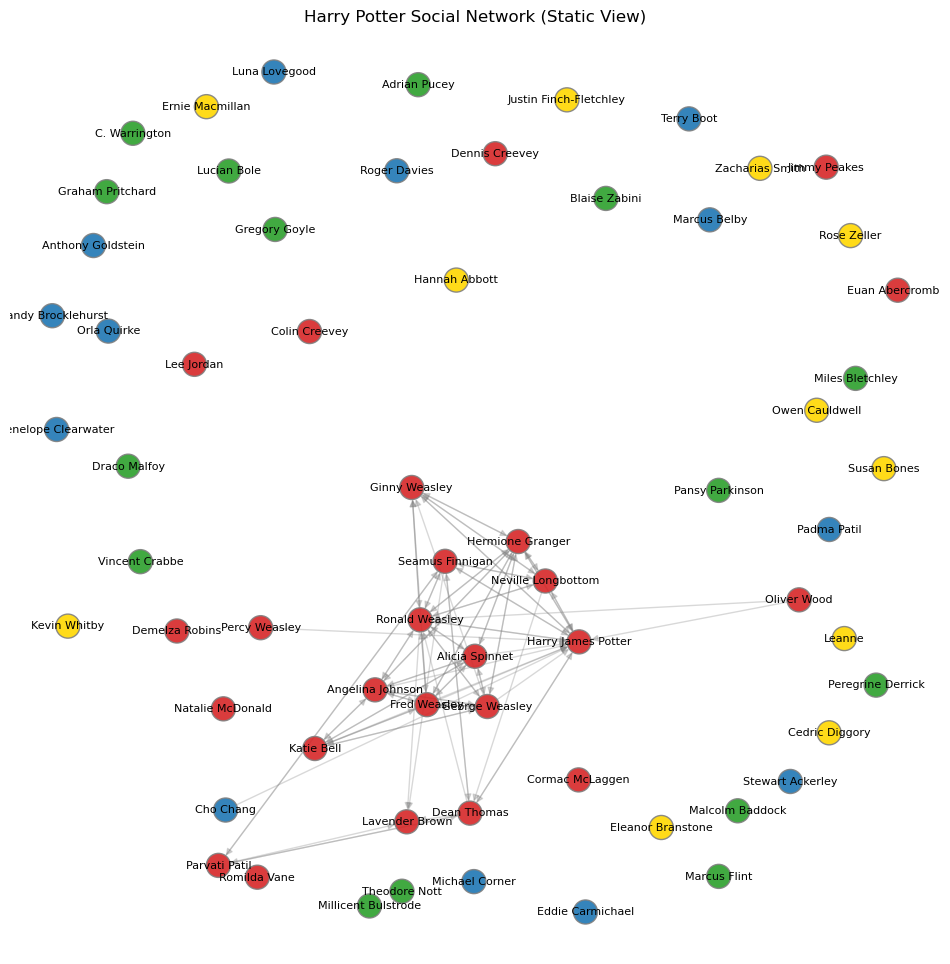

In [196]:
plt.figure(figsize=(12, 12)) 
color_map_scheme = {
    '1': 'tab:red',    # 红色 (Gryffindor)
    '2': 'gold',       # 黄色 (Hufflepuff) 
    '3': 'tab:blue',   # 蓝色 (Ravenclaw)
    '4': 'tab:green'   # 绿色 (Slytherin)
}


node_colors = []
for node in HP.nodes():
    house_id = HP.nodes[node].get('house') 
    
    color = color_map_scheme.get(house_id, 'lightgrey') 
    node_colors.append(color)


pos = nx.spring_layout(HP, k=0.3, iterations=10, seed=42) 


nx.draw_networkx_nodes(HP, pos, node_color=node_colors, edgecolors='grey', alpha=0.9)

nx.draw_networkx_edges(HP, pos, alpha=0.3, edge_color='grey')

labels_dict = nx.get_node_attributes(HP, 'name')
nx.draw_networkx_labels(HP, pos, labels=labels_dict, font_size=8, font_family='sans-serif')


plt.title("Harry Potter Social Network (Static View)")
plt.axis('off') 
plt.show()

#### Adding attributes
https://www.kaggle.com/datasets/gulsahdemiryurek/harry-potter-dataset

In [197]:
characters = pd.read_csv("F:/DTU/02805 Social Graphs/projectB/harrypotter/Characters.csv", sep=';')
characters

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,Bright green,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,31 July 1980,NaN
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,1 March 1980,NaN
2,3,Hermione Jean Granger,Female,Student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,Human,Muggle-born,Brown,Brown,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything,"19 September, 1979",NaN
3,4,Albus Percival Wulfric Brian Dumbledore,Male,Headmaster,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,Human,Half-blood,Silver| formerly auburn,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...,Late August 1881,"30 June, 1997"
4,5,Rubeus Hagrid,Male,Keeper of Keys and Grounds | Professor of Care...,Gryffindor,"16"" Oak unknown core",None,Half-Human/Half-Giant,Part-Human (Half-giant),Black,Black,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...,6 December 1928,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,Wilhelmina Grubbly-Plank,Female,Substitute professor of Care of Magical Creatu...,NaN,Unknown,Non-corporeal,Human,NaN,Grey,NaN,Hogwarts School of Witchcraft and Wizardry,NaN,NaN,NaN
136,137,Fenrir Greyback,Male,NaN,NaN,Unknown,None,Werewolf,NaN,Grey,NaN,Lord Voldemort | Death Eaters,Physical combat,Pre 1945,NaN
137,138,Gellert Grindelwald,Male,Revolutionary leader(c. 1920s[6] – 1945),NaN,"15"", Elder, Thestral tail hair core",NaN,Human,Pure-blood or half-blood,Blond,Blue,Gellert Grindelwald's Acolytes,Duelling,1883,"March, 1998"
138,139,Dobby,Male,"Malfoy family's house-elf (? - 1993),\nHogwart...",NaN,NaN,NaN,House elf,NaN,Green,NaN,NaN,"A type of magic specific to house-elves, perfo...",28 June,"Late March, 1998"


In [198]:
columns_to_add = ['Species', 'Blood status', 'Skills']

for node in HP.nodes:
    if 'name' in HP.nodes[node]:
        node_name = HP.nodes[node]['name']
        
        all_names = characters['Name'].tolist()
        matches = difflib.get_close_matches(node_name, all_names, n=1, cutoff=0.6)

                
        if matches:
            best_match = matches[0]
            matched = characters[characters['Name'] == best_match]

            row = matched.iloc[0]

            for col in columns_to_add:
                if col in characters.columns:
                    HP.nodes[node][col] = row[col]
                    

list(HP.nodes(data=True))[:5]

[(1,
  {'name': 'Adrian Pucey', 'schoolyear': '1989', 'gender': '1', 'house': '4'}),
 (2,
  {'name': 'Alicia Spinnet',
   'schoolyear': '1989',
   'gender': '2',
   'house': '1',
   'Species': 'Human',
   'Blood status': 'Pure-blood\xa0or\xa0half-blood',
   'Skills': 'Chaser'}),
 (3,
  {'name': 'Angelina Johnson',
   'schoolyear': '1989',
   'gender': '2',
   'house': '1',
   'Species': 'Human',
   'Blood status': 'Unknown',
   'Skills': 'Chaser'}),
 (4,
  {'name': 'Anthony Goldstein',
   'schoolyear': '1991',
   'gender': '1',
   'house': '3',
   'Species': 'Human',
   'Blood status': 'Half-blood',
   'Skills': 'Prefect'}),
 (5,
  {'name': 'Blaise Zabini',
   'schoolyear': '1991',
   'gender': '1',
   'house': '4',
   'Species': 'Human',
   'Blood status': 'Pure-blood\xa0or\xa0half-blood',
   'Skills': 'Chaser'})]

In [199]:
list(HP.nodes(data=True))[24]

(25,
 {'name': 'Harry James Potter',
  'schoolyear': '1991',
  'gender': '1',
  'house': '1',
  'Species': 'Human',
  'Blood status': 'Half-blood',
  'Skills': 'Parseltongue| Defence Against the Dark Arts | Seeker'})

#### Text
https://www.kaggle.com/datasets/gulsahdemiryurek/harry-potter-dataset

In [200]:
characters = nx.get_node_attributes(HP, 'name')
book_characters = list(characters.values())
book_characters

['Adrian Pucey',
 'Alicia Spinnet',
 'Angelina Johnson',
 'Anthony Goldstein',
 'Blaise Zabini',
 'C. Warrington',
 'Cedric Diggory',
 'Cho Chang',
 'Colin Creevey',
 'Cormac McLaggen',
 'Dean Thomas',
 'Demelza Robins',
 'Dennis Creevey',
 'Draco Malfoy',
 'Eddie Carmichael',
 'Eleanor Branstone',
 'Ernie Macmillan',
 'Euan Abercrombie',
 'Fred Weasley',
 'George Weasley',
 'Ginny Weasley',
 'Graham Pritchard',
 'Gregory Goyle',
 'Hannah Abbott',
 'Harry James Potter',
 'Hermione Granger',
 'Jimmy Peakes',
 'Justin Finch-Fletchley',
 'Katie Bell',
 'Kevin Whitby',
 'Lavender Brown',
 'Leanne',
 'Lee Jordan',
 'Lucian Bole',
 'Luna Lovegood',
 'Malcolm Baddock',
 'Mandy Brocklehurst',
 'Marcus Belby',
 'Marcus Flint',
 'Michael Corner',
 'Miles Bletchley',
 'Millicent Bulstrode',
 'Natalie McDonald',
 'Neville Longbottom',
 'Oliver Wood',
 'Orla Quirke',
 'Owen Cauldwell',
 'Padma Patil',
 'Pansy Parkinson',
 'Parvati Patil',
 'Penelope Clearwater',
 'Percy Weasley',
 'Peregrine Derric

In [201]:
movie_script = pd.read_csv("F:/DTU/02805 Social Graphs/projectB/harrypotter/Harry Potter 3.csv", sep=';')

def clean_name(name):
    if pd.isna(name):
        return ""
    name = name.replace('\xa0', ' ')
    name = re.sub(r'\s+', ' ', name)
    return name.strip()

movie_script['CHARACTER'] = movie_script['CHARACTER'].astype(str).apply(clean_name)


def split_characters(name):
    name = name.replace("AND", "&").replace("and", "&")
    parts = re.split(r'[,&-]', name)
    return [clean_name(p) for p in parts if p.strip()]

movie_script['CHARACTER'] = movie_script['CHARACTER'].apply(split_characters)
movie_script = movie_script.explode('CHARACTER').reset_index(drop=True)
movie_characters_raw = list(movie_script['CHARACTER'].unique())
movie_characters_raw

['HARRY',
 'AUNT PETUNIA',
 'UNCLE VERNON',
 'AUNT MARGE',
 'STAN SHUNPIKE',
 'SHRUNKEN HEAD',
 'TOM',
 'FUDGE',
 'VENDOR',
 'HOUSEKEEPER',
 'RON',
 'HERMIONE',
 'GEORGE',
 'FRED',
 'MRS. WEASLEY',
 'MR. WEASLEY',
 'LUPIN',
 'DUMBLEDORE',
 'DRACO',
 'SEAMUS',
 'FAT LADY',
 'DEAN',
 'TRELAWNEY',
 'NEVILLE',
 'BEM',
 'HAGRID',
 'PANSY PARKINSON',
 'BOY',
 'CLASS',
 'PARVATI',
 'MCGONAGALL',
 'FILCH',
 'PERCY',
 'GINNY',
 'TEACHER',
 'SNAPE',
 'CROWD',
 'MAN',
 'WITCH',
 'CRABBE',
 'MADAM ROSMERTA',
 'SHRUNKEN HEAD 1',
 'SHRUNKEN HEAD 2',
 'VOICE',
 'GOYLE',
 'SIRIUS',
 'PETTIGREW',
 'BOY 1',
 'BOY 2']

In [202]:
mapping_list = []
movie_chars_upper = [m.upper() for m in movie_characters_raw]

for book_name in book_characters:
    book_name_upper = book_name.upper()
    
    candidates = [m for m in movie_chars_upper if m in book_name_upper or book_name_upper in m]
    
    if not candidates:
        candidates = difflib.get_close_matches(book_name_upper, movie_chars_upper, n=1, cutoff=0.6)
    
    best_match = candidates[0] if candidates else None
    
    mapping_list.append({
        'Book_Name': book_name,
        'Auto_Matched_Movie_Name': best_match,
    })

results = []

for item in mapping_list:
    book = item['Book_Name']
    character = item['Auto_Matched_Movie_Name']

    matched_sentences = movie_script.loc[
        movie_script['CHARACTER'] == character, 'SENTENCE'
    ]

    merged_sentence = " ".join(matched_sentences.tolist())

    results.append({
        'Book_Name': book,
        'Auto_Matched_Movie_Name': character,
        'Sentence': merged_sentence
    })

result_df = pd.DataFrame(results)

In [203]:
result_df

,Book_Name,Auto_Matched_Movie_Name,Sentence
0,Adrian Pucey,None,
1,Alicia Spinnet,None,
2,Angelina Johnson,None,
3,Anthony Goldstein,None,
4,Blaise Zabini,None,
...,...,...,...
59,Susan Bones,None,
60,Terry Boot,None,
61,Theodore Nott,None,
62,Vincent Crabbe,CRABBE,What? Malfoy! Wait! Wait!


In [204]:
result_df.index = range(1, len(result_df) + 1)
text_dict = result_df['Sentence'].to_dict()

text_dict

{1: '',
 2: '',
 3: '',
 4: '',
 5: '',
 6: '',
 7: '',
 8: '',
 9: '',
 10: '',
 11: "Oh, God. You call that a monkey? That's a boggart, that is.",
 12: '',
 13: '',
 14: "Potter. Is it true you fainted? I mean, you actually fainted? Exactly how do we do that? Don't be such a wimp, Longbottom. Oh, yeah. Terribly funny. Witty. God, this place has gone to the dogs. Wait until Father hears Dumbledore's got this oaf teaching classes. Dementor! Dementor! Oh, please. You're not dangerous at all, are you, you great ugly brute! It's killed me! You're gonna regret this. You and your bloody chicken! It comes and it goes. Still, I consider myself lucky. Madam Pomfrey said another minute and I could've lost my arm. I can't do homework for weeks. This class is ridiculous. Well, well. Look who's here. You two shopping for your new dream home? Bit grand for you, isn't it, Weasle-Bee? Don't your family sleep in one room? Not very friendly. Boys, I think it's time we teach Weasle-Bee how to respect hi

In [205]:
nx.set_node_attributes(HP, text_dict, 'dialogue_text')
print(list(HP.nodes(data=True))[24])

(25, {'name': 'Harry James Potter', 'schoolyear': '1991', 'gender': '1', 'house': '1', 'Species': 'Human', 'Blood status': 'Half-blood', 'Skills': 'Parseltongue| Defence Against the Dark Arts | Seeker', 'dialogue_text': "Lumos Maxima... Lumos Maxima... Lumos Maxima... Lumos... MAXIMA! Uncle Vernon. I need you to sign this form. Nothing. School stuff I will if she does. Yes. Okay. Oh, yeah. Yeah. I've been beaten loads of times. That's a lie. My dad wasn't a drunk. Shut up! Shut up! No. She deserved what she got. Keep away from me. Yeah? Try me. I don't care. Anywhere is better than here. I fell over. I didn't do it on purpose. Nothing. I didn't. he Leaky Cauldron. That's in London. But the Muggles. Can't they see us? Who is that? That man. How did he escape? Yeah. Him I've heard of. Hedwig. No, thank you. Minister? I don't understand. I broke the law. Underage wizards can't use magic at home. The state of things, sir? Sirius Black, you mean? But what's he got to do with me? Hedwig. Egy

In [206]:
data = nx.readwrite.json_graph.node_link_data(HP)

with open('HP3.json', 'w') as f:
    json.dump(data, f)

### Czech School Network
https://data.mendeley.com/datasets/9c3dth6cwp/2

#### 尝试画一个图并添加属性

In [24]:
file_path = 'F:/DTU/02805 Social Graphs/projectB/Czech school students/relational data.xlsx'
# sheet_names = ['01end', '02end', '03end', '04end', '05end', '06end']
sheet = '01end'
df = pd.read_excel(file_path, sheet_name=sheet, index_col=0)
df

,0101,0102,0103,0104,0105,0106,0107,0108,0109,0110,...,0115,0116,0117,0118,0119,0120,0121,0122,0123,0124
101,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0
102,1,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,1
103,0,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,0
104,0,0,0,0,0,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
105,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
106,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
107,0,1,1,1,0,0,0,1,1,1,...,1,1,0,1,0,1,1,0,1,1
108,0,0,1,0,0,0,1,0,1,0,...,1,1,0,1,0,1,0,0,0,1
109,0,1,1,1,0,0,1,1,0,1,...,1,1,0,1,0,1,1,0,0,1
110,1,0,0,1,1,1,0,1,1,0,...,0,0,0,0,1,0,1,1,1,0


In [30]:
df.columns = df.columns.astype(int)
df.index = df.index.astype(int)

df

,101,102,103,104,105,106,107,108,109,110,...,115,116,117,118,119,120,121,122,123,124
101,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0
102,1,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,1
103,0,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,0
104,0,0,0,0,0,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
105,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
106,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
107,0,1,1,1,0,0,0,1,1,1,...,1,1,0,1,0,1,1,0,1,1
108,0,0,1,0,0,0,1,0,1,0,...,1,1,0,1,0,1,0,0,0,1
109,0,1,1,1,0,0,1,1,0,1,...,1,1,0,1,0,1,1,0,0,1
110,1,0,0,1,1,1,0,1,1,0,...,0,0,0,0,1,0,1,1,1,0


In [52]:
G = nx.DiGraph()

G.add_nodes_from(df.index)   # 行节点

for src in df.index:
    for dst in df.columns:
        if df.loc[src, dst] == 1:
            G.add_edge(src, dst)

In [53]:
G.nodes

NodeView((101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124))

In [54]:
attributes = pd.read_excel("F:/DTU/02805 Social Graphs/projectB/Czech school students/student attributes.xlsx", header=1)
print(type(attributes['studentID'][0]))
attributes.head()

<class 'numpy.int64'>


,studentID,classroomID,classroom_type,gender,ESeC,HISEI,whole_classroom_talk_start,whole_classroom_talk_end,literacy_start,literacy_end,need_of_success,avoidance_of_failure
0,101,1,experimental,male,salariat,70.0,8.425,13.980,67.94872,82.05,3.0,4.0
1,102,1,experimental,female,salariat,58.0,13.960,11.085,46.15385,53.85,4.0,1.0
2,103,1,experimental,female,salariat,70.0,0.000,15.420,42.30770,39.74,3.0,3.0
3,104,1,experimental,female,intermediate,53.0,39.380,16.610,14.10256,32.05,3.0,5.0
4,105,1,experimental,male,intermediate,51.0,3.230,12.405,-16.66667,52.56,1.0,2.0


In [55]:
fields = [
    'gender',
    'HISEI',
    'whole_classroom_talk_end',
    'literacy_end',
    'need_of_success',
    'avoidance_of_failure'
]


In [56]:
for node in G.nodes:
    matched = attributes[attributes['studentID'] == node]

    if len(matched) == 1:
        row = matched.iloc[0]
        for col in fields:
            G.nodes[node][col] = row[col]

In [57]:
list(G.nodes(data=True))[:5]


[(101,
  {'gender': 'male',
   'HISEI': 70.0,
   'whole_classroom_talk_end': 13.98,
   'literacy_end': 82.05,
   'need_of_success': 3.0,
   'avoidance_of_failure': 4.0}),
 (102,
  {'gender': 'female',
   'HISEI': 58.0,
   'whole_classroom_talk_end': 11.085,
   'literacy_end': 53.85,
   'need_of_success': 4.0,
   'avoidance_of_failure': 1.0}),
 (103,
  {'gender': 'female',
   'HISEI': 70.0,
   'whole_classroom_talk_end': 15.420000000000002,
   'literacy_end': 39.74,
   'need_of_success': 3.0,
   'avoidance_of_failure': 3.0}),
 (104,
  {'gender': 'female',
   'HISEI': 53.0,
   'whole_classroom_talk_end': 16.61,
   'literacy_end': 32.05,
   'need_of_success': 3.0,
   'avoidance_of_failure': 5.0}),
 (105,
  {'gender': 'male',
   'HISEI': 51.0,
   'whole_classroom_talk_end': 12.405000000000001,
   'literacy_end': 52.56,
   'need_of_success': 1.0,
   'avoidance_of_failure': 2.0})]

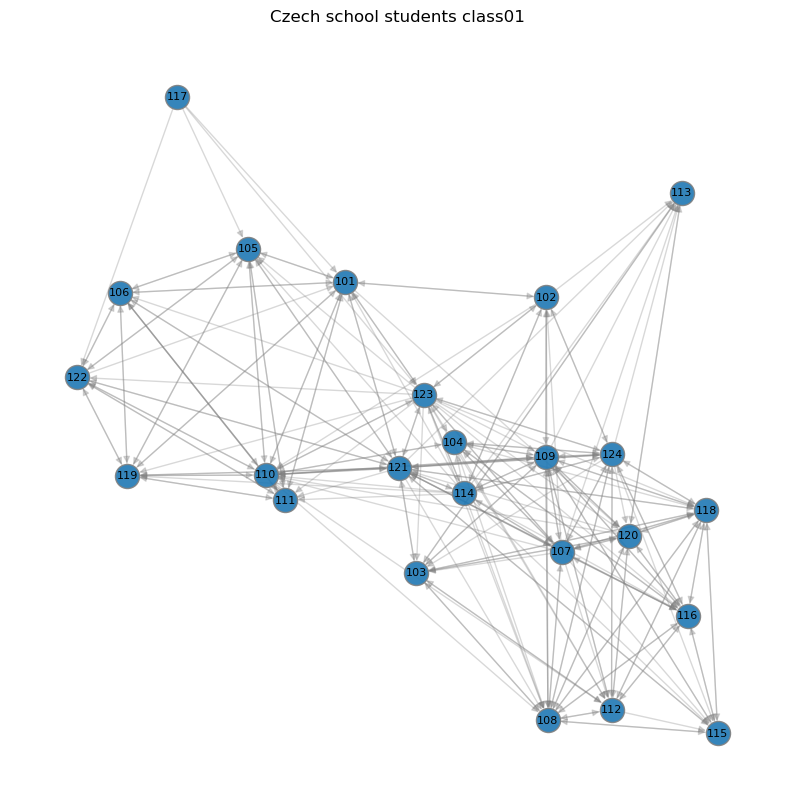

In [60]:
plt.figure(figsize=(10, 10)) 


pos = nx.spring_layout(G, k=0.3, iterations=10, seed=42) 


nx.draw_networkx_nodes(G, pos, edgecolors='grey', alpha=0.9)

nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='grey')

nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

plt.title("Czech school students class01")
plt.axis('off') 
plt.show()

#### 批量画六个图

In [ ]:
file_path = 'F:/DTU/02805 Social Graphs/projectB/Czech school students/relational data.xlsx'
attributes_path = "F:/DTU/02805 Social Graphs/projectB/Czech school students/student attributes.xlsx"

sheet_names = ['01start', '01end', '02start', '02end', '03start', '03end', '04start', '04end', '05start', '05end', '06start', '06end']

attributes = pd.read_excel(attributes_path, header=1)

fields = [
    'gender',
    'HISEI',
    'whole_classroom_talk_end',
    'literacy_end',
    'need_of_success',
    'avoidance_of_failure'
]

graphs = {}

for sheet in sheet_names:
    print(f"Processing sheet: {sheet}")
    
    df = pd.read_excel(file_path, sheet_name=sheet, index_col=0)
    df.columns = df.columns.astype(int)
    df.index = df.index.astype(int)
    
    G = nx.DiGraph()
    G.add_nodes_from(df.index)
    
    for src in df.index:
        for dst in df.columns:
            if df.loc[src, dst] == 1:
                G.add_edge(src, dst)
    
    for node in G.nodes:
        matched = attributes[attributes['studentID'] == node]
        
        if len(matched) == 1:
            row = matched.iloc[0]
            for col in fields:
                G.nodes[node][col] = row[col]
    
    graphs[sheet] = G
    
    print(f"  - Nodes: {G.number_of_nodes()}")
    print(f"  - Edges: {G.number_of_edges()}")
    print()

print("All graphs created successfully!")
print(f"Available graphs: {list(graphs.keys())}")

G1 = graphs['01end']
print(f"\nGraph 01end has {G1.number_of_nodes()} nodes and {G1.number_of_edges()} edges")

Processing sheet: 01end
  - Nodes: 24
  - Edges: 237

Processing sheet: 02end
  - Nodes: 26
  - Edges: 215

Processing sheet: 03end
  - Nodes: 23
  - Edges: 154

Processing sheet: 04end
  - Nodes: 24
  - Edges: 240

Processing sheet: 05end
  - Nodes: 26
  - Edges: 212

Processing sheet: 06end
  - Nodes: 22
  - Edges: 156

All graphs created successfully!
Available graphs: ['01end', '02end', '03end', '04end', '05end', '06end']

Graph 01end has 24 nodes and 237 edges


In [207]:
G1.nodes(data=True)

NodeDataView({101: {'gender': 'male', 'HISEI': 70.0, 'whole_classroom_talk_end': 13.98, 'literacy_end': 82.05, 'need_of_success': 3.0, 'avoidance_of_failure': 4.0}, 102: {'gender': 'female', 'HISEI': 58.0, 'whole_classroom_talk_end': 11.085, 'literacy_end': 53.85, 'need_of_success': 4.0, 'avoidance_of_failure': 1.0}, 103: {'gender': 'female', 'HISEI': 70.0, 'whole_classroom_talk_end': 15.420000000000002, 'literacy_end': 39.74, 'need_of_success': 3.0, 'avoidance_of_failure': 3.0}, 104: {'gender': 'female', 'HISEI': 53.0, 'whole_classroom_talk_end': 16.61, 'literacy_end': 32.05, 'need_of_success': 3.0, 'avoidance_of_failure': 5.0}, 105: {'gender': 'male', 'HISEI': 51.0, 'whole_classroom_talk_end': 12.405000000000001, 'literacy_end': 52.56, 'need_of_success': 1.0, 'avoidance_of_failure': 2.0}, 106: {'gender': 'male', 'HISEI': 77.0, 'whole_classroom_talk_end': 7.37, 'literacy_end': 87.18, 'need_of_success': 3.0, 'avoidance_of_failure': 2.0}, 107: {'gender': 'female', 'HISEI': 44.0, 'whole_